DSAC-FA-MVP-Timeseries-Analysis-Forecasting

In [29]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import matplotlib.dates as mdates

In [30]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021,12,31)
df = web.DataReader("TSLA", 'yahoo', start, end)

In [31]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,718.719971,691.119995,699.989990,705.669983,49649900,705.669983
2021-01-04,744.489990,717.190002,719.460022,729.770020,48638200,729.770020
2021-01-05,740.840027,719.200012,723.659973,735.109985,32245200,735.109985
2021-01-06,774.000000,749.099976,758.489990,755.979980,44700000,755.979980
2021-01-07,816.989990,775.200012,777.630005,816.039978,51498900,816.039978


In [32]:
df.reset_index(inplace=True)

In [33]:
data=df[["Date","Adj Close"]]

In [34]:
data=data.rename(columns={"Date": "ds", "Adj Close": "y"})

In [35]:
data.head()

,ds,y
0,2020-12-31,705.669983
1,2021-01-04,729.770020
2,2021-01-05,735.109985
3,2021-01-06,755.979980
4,2021-01-07,816.039978


In [36]:
df_train=data[0:200]
df_test=data[200:253]

In [37]:
m = Prophet()
m.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future = m.make_future_dataframe(periods=411)

In [39]:
forecast = m.predict(future)

In [40]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
606,2022-11-26,1268.900506,926.267893,1606.850515
607,2022-11-27,1270.283152,936.059290,1604.570595
608,2022-11-28,1354.848747,1016.038386,1685.057986
609,2022-11-29,1360.700185,1023.547609,1698.629710
610,2022-11-30,1361.204107,1021.550282,1694.071327


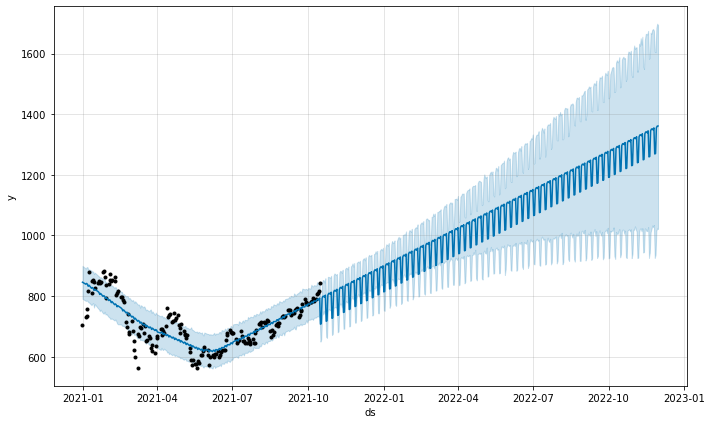

In [41]:
fig1 = m.plot(forecast)

Ford

In [42]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021,12,31)
df = web.DataReader("F", 'yahoo', start, end)

In [43]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,8.86,8.78,8.84,8.79,40176500.0,8.701225
2021-01-04,8.84,8.43,8.81,8.52,85043100.0,8.433952
2021-01-05,8.72,8.46,8.47,8.65,70127800.0,8.562639
2021-01-06,8.94,8.68,8.79,8.84,72590200.0,8.750721
2021-01-07,9.08,8.88,8.94,9.06,77117100.0,8.968499


In [44]:
df.reset_index(inplace=True)

In [45]:
data=df[["Date","Adj Close"]]

In [46]:
data=data.rename(columns={"Date": "ds", "Adj Close": "y"})

In [47]:
data.head()

,ds,y
0,2020-12-31,8.701225
1,2021-01-04,8.433952
2,2021-01-05,8.562639
3,2021-01-06,8.750721
4,2021-01-07,8.968499


In [48]:
df_train=data[0:200]
df_test=data[200:253]

In [49]:
m = Prophet()
m.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future = m.make_future_dataframe(periods=411)

In [51]:
forecast = m.predict(future)

In [52]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
606,2022-11-26,13.042728,9.568976,16.775879
607,2022-11-27,13.042619,9.548016,16.817063
608,2022-11-28,13.641191,10.030957,17.497071
609,2022-11-29,13.648495,10.014891,17.453542
610,2022-11-30,13.704044,10.311414,17.461282


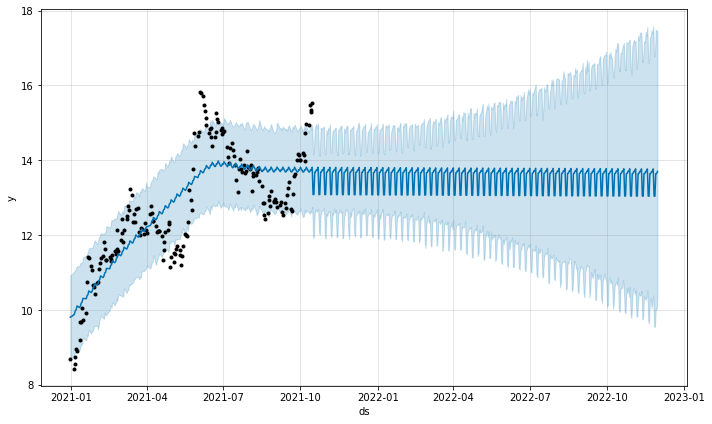

In [53]:
fig1 = m.plot(forecast)